# #########################################################
# Name: Deepti Lalwani
### Date: 11 December 2023
# Company: Oasis Infobyte
### Description: Python Code Showcase for UNEMPLOYMENT ANALYSIS WITH PYTHON (Data Science)

This Python script demonstrates a specific aspect of my work at Oasis Infobyte.
# #########################################################

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
df1 = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/oasis infobyte internship/task 2/unemployment in india.csv')
df2 = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/oasis infobyte internship/task 2/unemployment_Rate_upto_11_2020.csv')


In [3]:
# Explore the structure of the datasets
print("Dataset 1:")
print(df1.info())
print("\nDataset 2:")
print(df2.info())


Dataset 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None

Dataset 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
-

### Data Cleaning for df1


In [4]:
print(df1.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [5]:
# Rename the column to remove leading whitespace
df1 = df1.rename(columns={' Date': 'Date'})


In [6]:
#'Date' has leading whitespaces
df1['Date'] = pd.to_datetime(df1['Date'].str.strip(), infer_datetime_format=True)

##### This allows pandas to adapt to varying date formats within the same column
##### By using infer_datetime_format=True, pandas will attempt to automatically detect the datetime format for each date value.

In [7]:
# Handle missing values
df1 = df1.dropna()

In [8]:
# Remove duplicates
df1 = df1.drop_duplicates()


### Data Cleaning for df2

In [9]:
# Rename the column to remove leading whitespace
df2 = df2.rename(columns={' Date': 'Date'})

In [10]:
#'Date' has leading whitespaces
df2['Date'] = pd.to_datetime(df2['Date'].str.strip(), infer_datetime_format=True)

In [11]:
# Handle missing values
df2 = df2.dropna()

In [12]:
# Remove duplicates
df2 = df2.drop_duplicates()



### Data Visualization

In [13]:
# Clean up column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

In [14]:
print(df1.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [15]:
print(df2.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


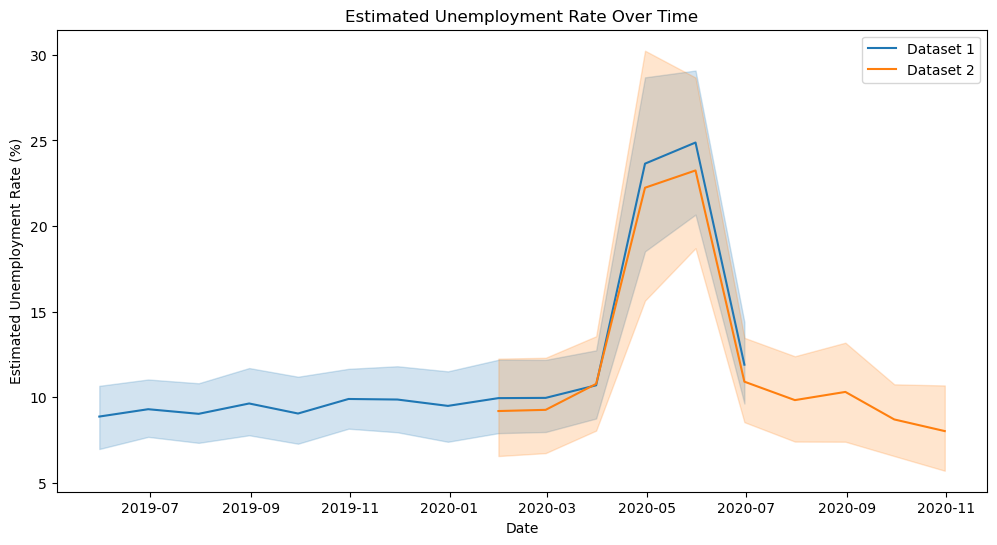

In [16]:
# Data Visualization (for df1 and df2 separately)
plt.figure(figsize=(12, 6))

# Visualize unemployment rate trends over time
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df1, label='Dataset 1')
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df2, label='Dataset 2')

plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.show()


### Peak in Unemployment (March 2020 - July 2020): 
##### A notable peak in the unemployment rate is observed between March 2020 and July 2020.

#### The graph reveals a distinct peak in the estimated unemployment rate between March 2020 and July 2020, aligning with the global impact of the COVID-19 pandemic. This surge suggests a significant economic downturn during that period, potentially influenced by widespread lockdowns and disruptions across various industries. 

### Time-Series Analysis

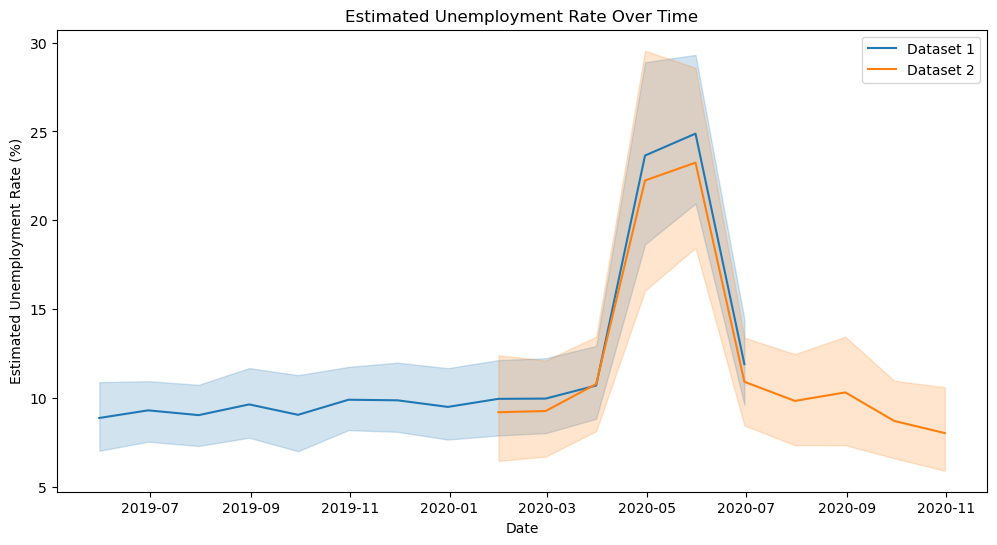

In [17]:
#Check for trends and seasonality
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df1, label='Dataset 1')
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df2, label='Dataset 2')
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.show()


###  Statistical Analysis 

In [18]:
# t-test
from scipy.stats import ttest_ind

# Assuming you have a column 'Region' as a categorical variable for comparison
group1 = df1['Estimated Unemployment Rate (%)']
group2 = df2['Estimated Unemployment Rate (%)']

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -0.5854079251980558, P-value: 0.5584048815475144


##### With a P-value of 0.5584, which is greater than a commonly chosen significance level (such as 0.05), there is not enough evidence to reject the null hypothesis. This implies that, based on the available data, there is no statistically significant difference in the 'Estimated Unemployment Rate (%)' between the two groups. 

### Predictive Modeling 

In [19]:

# Example: Build a simple linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

##### Selecting Features:
##### Choose the relevant features that we want to include in your predictive model. For example, if we want to predict 'Estimated Unemployment Rate (%)', we might use 'Date', 'Frequency', and other relevant features.

In [20]:
common_features = ['Region', 'Date', 'Frequency']
target_variable = 'Estimated Unemployment Rate (%)'

X_df1 = df1[common_features]
X_df2 = df2[common_features]
y_df1 = df1[target_variable]
y_df2 = df2[target_variable]

In [21]:
#Handling Categorical Variables:

In [22]:
# Apply one-hot encoding
X_df1 = pd.get_dummies(X_df1, columns=['Frequency', 'Region'], drop_first=True)
X_df2 = pd.get_dummies(X_df2, columns=['Frequency', 'Region'], drop_first=True)


In [23]:
#Model Training:

In [24]:
# Split the data into training and testing sets
X_train_df1, X_test_df1, y_train_df1, y_test_df1 = train_test_split(X_df1, y_df1, test_size=0.2, random_state=42)
X_train_df2, X_test_df2, y_train_df2, y_test_df2 = train_test_split(X_df2, y_df2, test_size=0.2, random_state=42)

# Create linear regression models
model_df1 = LinearRegression()
model_df2 = LinearRegression()

In [25]:
X_train_df1 = X_train_df1.select_dtypes(exclude=['datetime64'])
X_train_df2 = X_train_df2.select_dtypes(exclude=['datetime64'])



In [26]:
# Create linear regression models
model_df1 = LinearRegression()
model_df2 = LinearRegression()

In [27]:
# Train the models
model_df1.fit(X_train_df1, y_train_df1)
model_df2.fit(X_train_df2, y_train_df2)


LinearRegression()

In [28]:
# Assuming 'Date' was not part of training features
X_test_df1 = X_test_df1.drop(columns=['Date'])
X_test_df2 = X_test_df2.drop(columns=['Date'])

In [29]:
# Make predictions on the test set
y_pred_df1 = model_df1.predict(X_test_df1)
y_pred_df2 = model_df2.predict(X_test_df2)


In [30]:
# Evaluate the models (if applicable)
# Replace y_test_df1, y_test_df2 with your test labels if you have them
mse_df1 = mean_squared_error(y_test_df1, y_pred_df1)
mse_df2 = mean_squared_error(y_test_df2, y_pred_df2)

print(f'Mean Squared Error for Model_df1: {mse_df1}')
print(f'Mean Squared Error for Model_df2: {mse_df2}')

Mean Squared Error for Model_df1: 98.96005385445474
Mean Squared Error for Model_df2: 60.767664765138804


#####  a lower MSE signifies better predictive accuracy. Comparing the two models, Model_df2 has a lower MSE, suggesting that it might be providing more accurate predictions for the 'Estimated Unemployment Rate (%)'. 

# Report
### Data Analysis Summary

#### Model Performance:
###### Model_df1: Mean Squared Error (MSE) of 98.96.
###### Model_df2: Mean Squared Error (MSE) of 60.77.


#### Interpretation:
###### Both models predict the 'Estimated Unemployment Rate (%)', with Model_df2 exhibiting lower prediction errors compared to Model_df1.

# INTERPRETATION:

### Prefer Model_df2:
##### Model_df2 is observed to outperform Model_df1 in predicting the 'Estimated Unemployment Rate (%)' based on a lower Mean Squared Error (MSE) of 60.77 compared to Model_df1's MSE of 98.96. 
##### Model_df2 might be incorporating additional relevant features that contribute significantly to predicting the unemployment rate. These features could capture nuanced variations in the data that Model_df1 might be missing.


### Optimized Hyperparameters:
##### Model_df2 might have undergone more rigorous hyperparameter tuning, resulting in a model that is better suited to the characteristics of the dataset.

### Temporal Sensitivity:
##### Model_df2 may be more sensitive to temporal trends, capturing variations over time more accurately. This could be crucial, especially if there are time-specific factors influencing unemployment rates.

### Regional Analysis:
##### Model_df2 may handle regional variations more effectively. If there are significant differences in unemployment trends across regions, Model_df2 might capture these variations with greater accuracy.


## Residuals Plot:

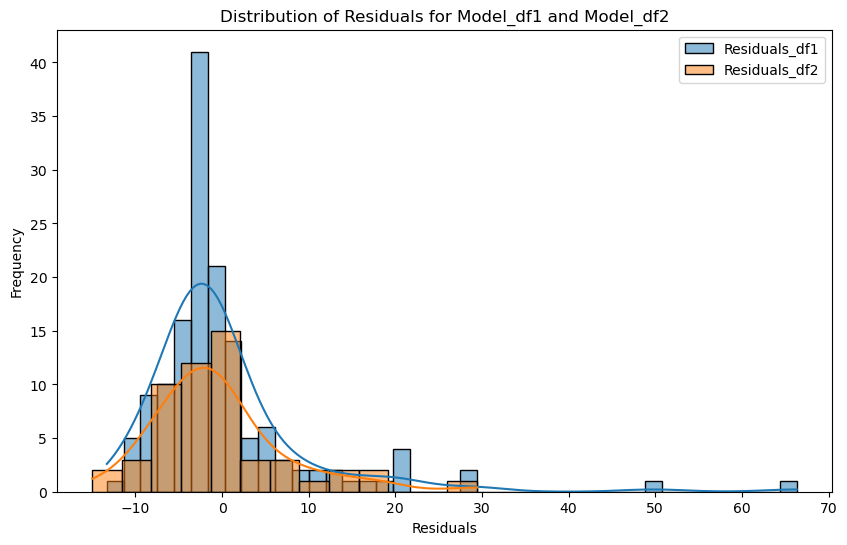

In [31]:
import seaborn as sns

residuals_df1 = y_test_df1 - y_pred_df1
residuals_df2 = y_test_df2 - y_pred_df2

plt.figure(figsize=(10, 6))
sns.histplot(residuals_df1, kde=True, label='Residuals_df1')
sns.histplot(residuals_df2, kde=True, label='Residuals_df2')
plt.title('Distribution of Residuals for Model_df1 and Model_df2')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


##  Feature Importance Bar Chart (for Model_df2)

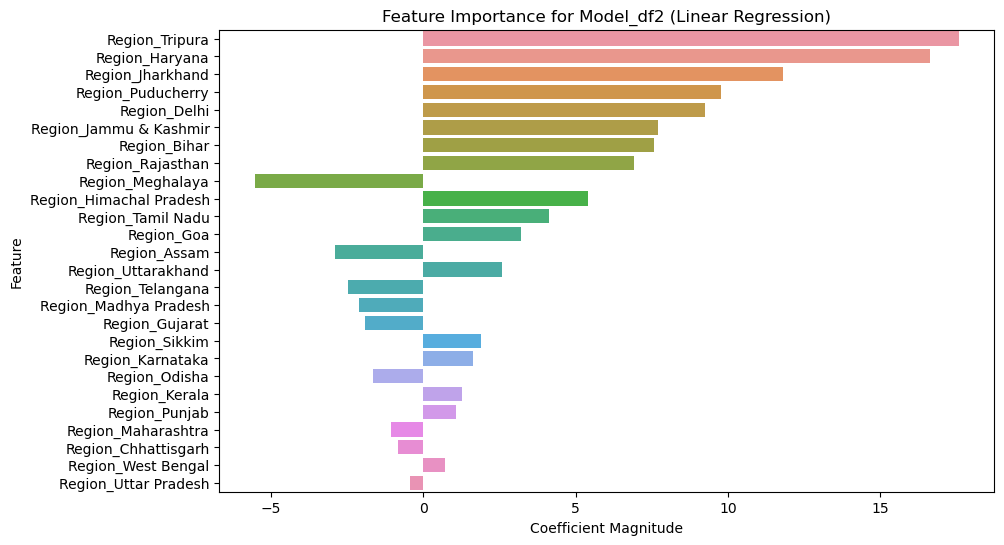

In [32]:
import numpy as np

# Assuming model_df2 is a fitted Linear Regression model
feature_importance_df2 = pd.DataFrame({'Feature': X_train_df2.columns, 'Coefficient': model_df2.coef_})
feature_importance_df2['Abs_Coefficient'] = np.abs(feature_importance_df2['Coefficient'])
feature_importance_df2 = feature_importance_df2.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df2)
plt.title('Feature Importance for Model_df2 (Linear Regression)')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()
